In [1]:
# import libraries
import pandas as pd
import numpy as np
from datetime import date
import missingno as msno

In [2]:
# Read in the data
house_df = pd.read_csv('assets/updated_house_price.csv')
pop_growth_df_1 = pd.read_csv('assets/population_growth_2000_2010.csv', encoding='latin-1')
pop_growth_df_2 = pd.read_csv('assets\population_growth_2010-2020.csv', encoding='latin-1')
pop_growth_df_3 = pd.read_csv('assets/population_growth_2020-2021.csv', encoding='latin-1')
unemploy_df = pd.read_csv('assets/wake_unemployment.csv')
covid_df = pd.read_csv('assets/covid_confirmed.csv')
mort_rate_df = pd.read_csv('assets/mort_rate.csv')
lumber_df = pd.read_csv('assets/lumber.csv')
metals_df = pd.read_csv('assets/metals.csv')
build_df = pd.read_csv('assets/build_material.csv')
int_rate_df = pd.read_csv('assets/int_rate.csv')
us_house_supply_df = pd.read_excel('assets/HousingSupply.xlsx', sheet_name="Manufactured_Annual")
us_house_demand_df = pd.read_excel('assets/HAI.xlsx', sheet_name="HAI_Annual")
wake_supply_df = pd.read_csv('assets\market_hotness_supply_index.csv')
wake_demand_df = pd.read_csv('assets\market_hotness_demand_index.csv')

## Mortgage rate

In [3]:
# Work on the mortgage rate data
mort_rate_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
mort_rate_df['date'] = pd.to_datetime(mort_rate_df['date'])
mort_rate_df['date'] = mort_rate_df['date'].dt.strftime('%Y-%m')
mort_rate_df.head()

,date,Rate
0,2000-01,8.21
1,2000-02,8.33
2,2000-03,8.24
3,2000-04,8.15
4,2000-05,8.52


In [4]:
# add 2022 Sep mortgage rate
mort_rate_2022 = {'date': '2022-09', 'Rate': 6.82}
mort_rate_df = mort_rate_df.append(mort_rate_2022, ignore_index=True)
mort_rate_df

,date,Rate
0,2000-01,8.21
1,2000-02,8.33
2,2000-03,8.24
3,2000-04,8.15
4,2000-05,8.52
...,...,...
268,2022-05,5.23
269,2022-06,5.52
270,2022-07,5.41
271,2022-08,5.22


### Combine mortgage rate to house price data

In [5]:
house_df['Deed_Date'] = pd.to_datetime(house_df['Deed_Date'])
house_df['Deed_Date'] = house_df['Deed_Date'].dt.strftime('%Y-%m')
house_df.drop(columns=['Unnamed: 0'], inplace=True)
# house_df

In [6]:
updated_house_df = house_df.merge(mort_rate_df, left_on='Deed_Date', right_on='date', how='left')
updated_house_df.rename(columns={'Rate': 'mort_rate'}, inplace=True)
updated_house_df.drop(columns=['date'], inplace=True)
updated_house_df.columns = map(str.lower, updated_house_df.columns)
print(updated_house_df.shape)
updated_house_df

(278913, 12)


,land_sale_price,total_sale_price,deed_date,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate
0,0.0,37500.0,2004-09,118723.0,1.00,2261,WSE,2.0,1.0,27591,wendell,5.75
1,0.0,380000.0,2015-08,161077.0,1.00,1789,ALL,2.0,1.0,27607,raleigh,3.91
2,0.0,337500.0,2012-12,273621.0,1.00,2463,ALL,2.0,1.0,27615,raleigh,3.35
3,0.0,319000.0,2010-06,503301.0,1.50,4650,ALL,3.5,1.0,27608,raleigh,4.74
4,0.0,425000.0,2008-04,203178.0,2.00,1890,ALL,2.0,1.0,27604,raleigh,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...
278908,0.0,1194000.0,2022-08,547787.0,1.88,4520,ALL,3.5,1.0,27502,apex,5.22
278909,0.0,1364500.0,2022-07,560914.0,1.88,4347,ALL,3.5,1.0,27502,apex,5.41
278910,0.0,220000.0,2022-06,93432.0,1.00,896,ALL,1.0,1.0,27529,garner,5.52
278911,0.0,170000.0,2021-05,119201.0,1.00,896,ALL,1.0,1.0,27529,garner,2.96


## Unemployment rate

In [7]:
unemploy_df['Year'] = unemploy_df['Year'].astype(str)
unemploy_df['Month'] = unemploy_df['Month'].astype(str)
unemploy_df['date'] = unemploy_df['Year'] + '-' + unemploy_df['Month']
unemploy_df['date'] = pd.to_datetime(unemploy_df['date'])
unemploy_df['date'] = unemploy_df['date'].dt.strftime('%Y-%m')
unemploy_df.rename(columns={'Unemployment Rate(%)': 'unemploy_rate'}, inplace=True)

### Combine unemployment rate to house price data

In [8]:
unemploy_df = unemploy_df[['date', 'unemploy_rate']].copy()
updated_house_df = updated_house_df.merge(unemploy_df, left_on='deed_date', right_on='date', how='left')
updated_house_df.drop(columns=['date'], inplace=True)
# updated_house_df.columns = map(str.lower, updated_house_df.columns)
print(updated_house_df.shape)
updated_house_df

(278913, 13)


,land_sale_price,total_sale_price,deed_date,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate,unemploy_rate
0,0.0,37500.0,2004-09,118723.0,1.00,2261,WSE,2.0,1.0,27591,wendell,5.75,4.2
1,0.0,380000.0,2015-08,161077.0,1.00,1789,ALL,2.0,1.0,27607,raleigh,3.91,4.9
2,0.0,337500.0,2012-12,273621.0,1.00,2463,ALL,2.0,1.0,27615,raleigh,3.35,7.0
3,0.0,319000.0,2010-06,503301.0,1.50,4650,ALL,3.5,1.0,27608,raleigh,4.74,8.4
4,0.0,425000.0,2008-04,203178.0,2.00,1890,ALL,2.0,1.0,27604,raleigh,5.92,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278908,0.0,1194000.0,2022-08,547787.0,1.88,4520,ALL,3.5,1.0,27502,apex,5.22,NaN
278909,0.0,1364500.0,2022-07,560914.0,1.88,4347,ALL,3.5,1.0,27502,apex,5.41,3.0
278910,0.0,220000.0,2022-06,93432.0,1.00,896,ALL,1.0,1.0,27529,garner,5.52,3.4
278911,0.0,170000.0,2021-05,119201.0,1.00,896,ALL,1.0,1.0,27529,garner,2.96,4.3


## Population growth
### 2000-2010

In [9]:
pop_growth_df_1 = pop_growth_df_1.loc[pop_growth_df_1['STNAME'] == 'North Carolina']
pop_growth_df_1 = pop_growth_df_1.loc[pop_growth_df_1['CTYNAME'] == 'Wake County']
pop_growth_df_1.drop(columns=['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME'], inplace=True)

In [10]:
pop_growth_df_1['rate_2001'] = (pop_growth_df_1['POPESTIMATE2001'] - pop_growth_df_1['POPESTIMATE2000']) / pop_growth_df_1['POPESTIMATE2000']
pop_growth_df_1['rate_2002'] = (pop_growth_df_1['POPESTIMATE2002'] - pop_growth_df_1['POPESTIMATE2001']) / pop_growth_df_1['POPESTIMATE2001']
pop_growth_df_1['rate_2003'] = (pop_growth_df_1['POPESTIMATE2003'] - pop_growth_df_1['POPESTIMATE2002']) / pop_growth_df_1['POPESTIMATE2002']
pop_growth_df_1['rate_2004'] = (pop_growth_df_1['POPESTIMATE2004'] - pop_growth_df_1['POPESTIMATE2003']) / pop_growth_df_1['POPESTIMATE2003']
pop_growth_df_1['rate_2005'] = (pop_growth_df_1['POPESTIMATE2005'] - pop_growth_df_1['POPESTIMATE2004']) / pop_growth_df_1['POPESTIMATE2004']
pop_growth_df_1['rate_2006'] = (pop_growth_df_1['POPESTIMATE2006'] - pop_growth_df_1['POPESTIMATE2005']) / pop_growth_df_1['POPESTIMATE2005']
pop_growth_df_1['rate_2007'] = (pop_growth_df_1['POPESTIMATE2007'] - pop_growth_df_1['POPESTIMATE2006']) / pop_growth_df_1['POPESTIMATE2006']
pop_growth_df_1['rate_2008'] = (pop_growth_df_1['POPESTIMATE2008'] - pop_growth_df_1['POPESTIMATE2007']) / pop_growth_df_1['POPESTIMATE2007']
pop_growth_df_1['rate_2009'] = (pop_growth_df_1['POPESTIMATE2009'] - pop_growth_df_1['POPESTIMATE2008']) / pop_growth_df_1['POPESTIMATE2008']
pop_growth_df_1['rate_2010'] = (pop_growth_df_1['POPESTIMATE2010'] - pop_growth_df_1['POPESTIMATE2009']) / pop_growth_df_1['POPESTIMATE2009']

In [11]:
pop_growth_df_1.drop(columns=['ESTIMATESBASE2000', 'CENSUS2010POP', 'POPESTIMATE2000', 'POPESTIMATE2001', 'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004', 'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007', 'POPESTIMATE2008', 'POPESTIMATE2009', 'POPESTIMATE2010'], inplace=True)
pop_growth_df_1.set_index('CTYNAME', inplace=True)
pop_growth_df_1.head()

,rate_2001,rate_2002,rate_2003,rate_2004,rate_2005,rate_2006,rate_2007,rate_2008,rate_2009,rate_2010
CTYNAME,,,,,,,,,,
Wake County,0.037191,0.0298,0.028614,0.029594,0.041478,0.050922,0.047917,0.042459,0.031678,0.02642


### 2011-2020

In [12]:
pop_growth_df_2 = pop_growth_df_2.loc[pop_growth_df_2['STNAME'] == 'North Carolina']
pop_growth_df_2 = pop_growth_df_2.loc[pop_growth_df_2['CTYNAME'] == 'Wake County']
pop_growth_df_2.drop(columns=['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME'], inplace=True)

In [13]:
pop_growth_df_2['rate_2011'] = (pop_growth_df_2['POPESTIMATE2011'] - pop_growth_df_2['POPESTIMATE2010']) / pop_growth_df_2['POPESTIMATE2010']
pop_growth_df_2['rate_2012'] = (pop_growth_df_2['POPESTIMATE2012'] - pop_growth_df_2['POPESTIMATE2011']) / pop_growth_df_2['POPESTIMATE2011']
pop_growth_df_2['rate_2013'] = (pop_growth_df_2['POPESTIMATE2013'] - pop_growth_df_2['POPESTIMATE2012']) / pop_growth_df_2['POPESTIMATE2012']
pop_growth_df_2['rate_2014'] = (pop_growth_df_2['POPESTIMATE2014'] - pop_growth_df_2['POPESTIMATE2013']) / pop_growth_df_2['POPESTIMATE2013']
pop_growth_df_2['rate_2015'] = (pop_growth_df_2['POPESTIMATE2015'] - pop_growth_df_2['POPESTIMATE2014']) / pop_growth_df_2['POPESTIMATE2014']
pop_growth_df_2['rate_2016'] = (pop_growth_df_2['POPESTIMATE2016'] - pop_growth_df_2['POPESTIMATE2015']) / pop_growth_df_2['POPESTIMATE2015']
pop_growth_df_2['rate_2017'] = (pop_growth_df_2['POPESTIMATE2017'] - pop_growth_df_2['POPESTIMATE2016']) / pop_growth_df_2['POPESTIMATE2016']
pop_growth_df_2['rate_2018'] = (pop_growth_df_2['POPESTIMATE2018'] - pop_growth_df_2['POPESTIMATE2017']) / pop_growth_df_2['POPESTIMATE2017']
pop_growth_df_2['rate_2019'] = (pop_growth_df_2['POPESTIMATE2019'] - pop_growth_df_2['POPESTIMATE2018']) / pop_growth_df_2['POPESTIMATE2018']
pop_growth_df_2['rate_2020'] = (pop_growth_df_2['POPESTIMATE2020'] - pop_growth_df_2['POPESTIMATE2019']) / pop_growth_df_2['POPESTIMATE2020']


In [14]:
pop_growth_df_2 = pop_growth_df_2[['CTYNAME', 'rate_2011', 'rate_2012', 'rate_2013', 'rate_2014', 'rate_2015', 'rate_2016', 'rate_2017', 'rate_2018', 'rate_2019', 'rate_2020']]
pop_growth_df_2.set_index('CTYNAME', inplace=True)
pop_growth_df_2.head()

,rate_2011,rate_2012,rate_2013,rate_2014,rate_2015,rate_2016,rate_2017,rate_2018,rate_2019,rate_2020
CTYNAME,,,,,,,,,,
Wake County,0.024292,0.025149,0.023357,0.024333,0.024694,0.025479,0.022432,0.018405,0.018855,0.017201


### 2021

In [15]:
pop_growth_df_3 = pop_growth_df_3.loc[pop_growth_df_3['STNAME'] == 'North Carolina']
pop_growth_df_3 = pop_growth_df_3.loc[pop_growth_df_3['CTYNAME'] == 'Wake County']
pop_growth_df_3.drop(columns=['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME'], inplace=True)

In [16]:
pop_growth_df_3['rate_2021'] = (pop_growth_df_3['POPESTIMATE2021'] - pop_growth_df_3['POPESTIMATE2020']) / pop_growth_df_3['POPESTIMATE2020']
pop_growth_df_3 = pop_growth_df_3[['CTYNAME', 'rate_2021']].copy()
pop_growth_df_3.set_index('CTYNAME', inplace=True)

pop_growth_df_3.head()


,rate_2021
CTYNAME,
Wake County,0.014689


#### Combine all population growth datasets together

In [17]:
pop_growth_df = pd.concat([pop_growth_df_1, pop_growth_df_2, pop_growth_df_3], axis=1)
pop_growth_df.head()

,rate_2001,rate_2002,rate_2003,rate_2004,rate_2005,rate_2006,rate_2007,rate_2008,rate_2009,rate_2010,...,rate_2012,rate_2013,rate_2014,rate_2015,rate_2016,rate_2017,rate_2018,rate_2019,rate_2020,rate_2021
CTYNAME,,,,,,,,,,,,,,,,,,,,,
Wake County,0.037191,0.0298,0.028614,0.029594,0.041478,0.050922,0.047917,0.042459,0.031678,0.02642,...,0.025149,0.023357,0.024333,0.024694,0.025479,0.022432,0.018405,0.018855,0.017201,0.014689


In [18]:
final_pop_growth = pop_growth_df.transpose()
final_pop_growth.reset_index(inplace=True)
final_pop_growth.rename(columns={'index':'year', 'Wake County':'pop_growth_rate'}, inplace=True)
final_pop_growth['year'] = final_pop_growth['year'].str.split('_').str[1]
final_pop_growth['year'] = pd.to_datetime(final_pop_growth['year'], format='%Y')
final_pop_growth['year'] = final_pop_growth['year'].dt.strftime('%Y')

final_pop_growth.rename_axis(None, axis=1, inplace=True)
final_pop_growth.head()

,year,pop_growth_rate
0,2001,0.037191
1,2002,0.029800
2,2003,0.028614
3,2004,0.029594
4,2005,0.041478


Check missing values for population growth data

In [19]:
final_pop_growth.isna().sum()

year               0
pop_growth_rate    0
dtype: int64

Since we missed 2000 and 2022 population data, we will use 2010 and 2020 Census Total Population annual growth rate respectively.

In [20]:
pop_growth_2000 = {'year': '2000', 'pop_growth_rate': 0.018}
pop_growth_2022 = {'year': '2022', 'pop_growth_rate': 0.025}
final_pop_growth = final_pop_growth.append(pop_growth_2000, ignore_index=True)
final_pop_growth = final_pop_growth.append(pop_growth_2022, ignore_index=True)
final_pop_growth.sort_values(by='year', inplace=True)
final_pop_growth.reset_index(drop=True, inplace=True)
final_pop_growth

,year,pop_growth_rate
0,2000,0.018000
1,2001,0.037191
2,2002,0.029800
3,2003,0.028614
4,2004,0.029594
5,2005,0.041478
6,2006,0.050922
7,2007,0.047917
8,2008,0.042459
9,2009,0.031678


In [21]:
updated_house_df['year'] = pd.to_datetime(updated_house_df['deed_date']).dt.year
updated_house_df['year'] = updated_house_df['year'].astype(str)
updated_house_df = updated_house_df.merge(final_pop_growth, left_on='year', right_on='year', how='left')
updated_house_df.drop(columns=['year'], inplace=True)
print(updated_house_df.shape)
updated_house_df

(278913, 14)


,land_sale_price,total_sale_price,deed_date,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate,unemploy_rate,pop_growth_rate
0,0.0,37500.0,2004-09,118723.0,1.00,2261,WSE,2.0,1.0,27591,wendell,5.75,4.2,0.029594
1,0.0,380000.0,2015-08,161077.0,1.00,1789,ALL,2.0,1.0,27607,raleigh,3.91,4.9,0.024694
2,0.0,337500.0,2012-12,273621.0,1.00,2463,ALL,2.0,1.0,27615,raleigh,3.35,7.0,0.025149
3,0.0,319000.0,2010-06,503301.0,1.50,4650,ALL,3.5,1.0,27608,raleigh,4.74,8.4,0.026420
4,0.0,425000.0,2008-04,203178.0,2.00,1890,ALL,2.0,1.0,27604,raleigh,5.92,3.7,0.042459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278908,0.0,1194000.0,2022-08,547787.0,1.88,4520,ALL,3.5,1.0,27502,apex,5.22,NaN,0.025000
278909,0.0,1364500.0,2022-07,560914.0,1.88,4347,ALL,3.5,1.0,27502,apex,5.41,3.0,0.025000
278910,0.0,220000.0,2022-06,93432.0,1.00,896,ALL,1.0,1.0,27529,garner,5.52,3.4,0.025000
278911,0.0,170000.0,2021-05,119201.0,1.00,896,ALL,1.0,1.0,27529,garner,2.96,4.3,0.014689


## COVID data

In [22]:
nc_covid = covid_df.loc[covid_df['State'] == 'NC']
# nc_covid.head()
wake_covid = nc_covid.loc[nc_covid['County Name'] == 'Wake County ']
wake_covid.drop(columns=['countyFIPS', 'StateFIPS', 'State', 'County Name'], inplace=True)
wake_covid.reset_index(drop=True, inplace=True)
wake_covid.head()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,9/6/2022,9/7/2022,9/8/2022,9/9/2022,9/10/2022,9/11/2022,9/12/2022,9/13/2022,9/14/2022,9/15/2022
0,0,0,0,0,0,0,0,0,0,0,...,359237,361248,361248,361248,361248,361248,361248,361248,363398,363398


In [23]:
covid_df = pd.DataFrame()
covid_df['date'] = pd.date_range(start='2000-01-01', end='2022-09-15', freq='D')
# covid_df

In [24]:
final_wake_covid = wake_covid.transpose()
final_wake_covid.reset_index(inplace=True)
final_wake_covid.rename(columns={'index':'date', 0:'covid_cases'}, inplace=True)
final_wake_covid['date'] = pd.to_datetime(final_wake_covid['date'])

final_wake_covid


,date,covid_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
962,2022-09-11,361248
963,2022-09-12,361248
964,2022-09-13,361248
965,2022-09-14,363398


In [25]:
final_covid_df = covid_df.merge(final_wake_covid, left_on='date', right_on='date', how='left')
# uncomment below to check fo zero values
# final_covid_df.loc[final_covid_df['covid_cases'] == 0]

# fill the rest of the zero and nan covid cases after pedemic with the previous day's covid cases
final_covid_df['covid_cases'].replace(to_replace=0, method='ffill', inplace=True)
final_covid_df['covid_cases'].fillna(method='ffill', inplace=True)

# uncomment below to re-check for zero values
# final_covid_df.loc[final_covid_df['covid_cases'] == 0]

# fill in missing covid cases before pandemic started with 0
final_covid_df.loc[final_covid_df['date'] < '2020-01-21', 'covid_cases'] = 0

final_covid_df 

,date,covid_cases
0,2000-01-01,0.0
1,2000-01-02,0.0
2,2000-01-03,0.0
3,2000-01-04,0.0
4,2000-01-05,0.0
...,...,...
8289,2022-09-11,361248.0
8290,2022-09-12,361248.0
8291,2022-09-13,361248.0
8292,2022-09-14,363398.0


In [26]:
# add covid cases as 0 before 2020
updated_house_df['deed_date'] = pd.to_datetime(updated_house_df['deed_date'])
updated_house_df['covid_cases'] = 0
updated_house_df.set_index('deed_date', inplace=True)
updated_house_df.update(final_covid_df.set_index('date'))
updated_house_df.reset_index(inplace=True)

print(updated_house_df.shape)
updated_house_df.head()

(278913, 15)


,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate,unemploy_rate,pop_growth_rate,covid_cases
0,2004-09-01,0.0,37500.0,118723.0,1.0,2261,WSE,2.0,1.0,27591,wendell,5.75,4.2,0.029594,0.0
1,2015-08-01,0.0,380000.0,161077.0,1.0,1789,ALL,2.0,1.0,27607,raleigh,3.91,4.9,0.024694,0.0
2,2012-12-01,0.0,337500.0,273621.0,1.0,2463,ALL,2.0,1.0,27615,raleigh,3.35,7.0,0.025149,0.0
3,2010-06-01,0.0,319000.0,503301.0,1.5,4650,ALL,3.5,1.0,27608,raleigh,4.74,8.4,0.026420,0.0
4,2008-04-01,0.0,425000.0,203178.0,2.0,1890,ALL,2.0,1.0,27604,raleigh,5.92,3.7,0.042459,0.0


## Raw materials data
### Lumber

In [27]:
lumber_df.rename(columns={'DATE':'date', 'WPU081':'lumber_price'}, inplace=True)
lumber_df['date'] = pd.to_datetime(lumber_df['date'])
lumber_df['date'] = lumber_df['date'].dt.strftime('%Y-%m')
lumber_df = lumber_df[lumber_df['date'] >= '2000-01']
lumber_df.reset_index(drop=True, inplace=True)
lumber_df.head()

,date,lumber_price
0,2000-01,189.1
1,2000-02,189.2
2,2000-03,188.5
3,2000-04,186.3
4,2000-05,180.3


### Metals

In [28]:
metals_df.rename(columns={'DATE':'date', 'WPU101':'metals_price'}, inplace=True)
metals_df['date'] = pd.to_datetime(metals_df['date'])
metals_df['date'] = metals_df['date'].dt.strftime('%Y-%m')
metals_df = metals_df[metals_df['date'] >= '2000-01']
metals_df.reset_index(drop=True, inplace=True)
metals_df.head()

,date,metals_price
0,2000-01,118.3
1,2000-02,118.2
2,2000-03,118.4
3,2000-04,119.0
4,2000-05,118.4


### Build materials

In [29]:
build_df.rename(columns={'DATE':'date', 'PCU44414441':'build_price'}, inplace=True)
build_df['date'] = pd.to_datetime(build_df['date'])
build_df['date'] = build_df['date'].dt.strftime('%Y-%m')
build_df = build_df[build_df['date'] >= '2000-01']
build_df.reset_index(drop=True, inplace=True)
build_df.head()

,date,build_price
0,2003-12,100.0
1,2004-01,102.5
2,2004-02,104.1
3,2004-03,105.1
4,2004-04,108.6


### Combine all together

In [30]:
lumber_metals_df = lumber_df.merge(metals_df, left_on='date', right_on='date', how='left')

final_material_df = lumber_metals_df.merge(build_df, left_on='date', right_on='date', how='left')
final_material_df.fillna(0, inplace=True)
final_material_df.head()

,date,lumber_price,metals_price,build_price
0,2000-01,189.1,118.3,0.0
1,2000-02,189.2,118.2,0.0
2,2000-03,188.5,118.4,0.0
3,2000-04,186.3,119.0,0.0
4,2000-05,180.3,118.4,0.0


### Combine raw material data to house data

In [31]:
final_material_df['date'] = pd.to_datetime(final_material_df['date'])
updated_house_df = updated_house_df.merge(final_material_df, left_on='deed_date', right_on='date', how='left')
updated_house_df.drop(columns=['date'], inplace=True)
updated_house_df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate,unemploy_rate,pop_growth_rate,covid_cases,lumber_price,metals_price,build_price
0,2004-09-01,0.0,37500.0,118723.0,1.0,2261,WSE,2.0,1.0,27591,wendell,5.75,4.2,0.029594,0.0,218.5,174.0,115.5
1,2015-08-01,0.0,380000.0,161077.0,1.0,1789,ALL,2.0,1.0,27607,raleigh,3.91,4.9,0.024694,0.0,196.6,193.0,138.3
2,2012-12-01,0.0,337500.0,273621.0,1.0,2463,ALL,2.0,1.0,27615,raleigh,3.35,7.0,0.025149,0.0,181.9,230.3,133.4
3,2010-06-01,0.0,319000.0,503301.0,1.5,4650,ALL,3.5,1.0,27608,raleigh,4.74,8.4,0.026420,0.0,170.1,233.5,120.0
4,2008-04-01,0.0,425000.0,203178.0,2.0,1890,ALL,2.0,1.0,27604,raleigh,5.92,3.7,0.042459,0.0,162.8,250.6,119.0


## Interest rate data

In [32]:
int_rate_df.drop(labels=[0,1,2], axis=0, inplace=True)
int_rate_df.columns = int_rate_df.iloc[0]
int_rate_df.drop(labels=[3], axis=0, inplace=True)
int_rate_df.reset_index(drop=True, inplace=True)

In [33]:
us_int_rate_df = int_rate_df.loc[int_rate_df['Country Code'] == 'USA']
us_int_rate_df.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)
us_int_rate_df.reset_index(drop=True, inplace=True)

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
us_int_rate_df = us_int_rate_df.transpose()
new_header = us_int_rate_df.iloc[0] #grab the first row for the header
us_int_rate_df = us_int_rate_df[1:] #take the data less the header row
us_int_rate_df.columns = new_header #set the header row as the df header
us_int_rate_df.reset_index(inplace=True)

In [35]:
us_int_rate_df.rename(columns={3:'date', 'USA':'int_rate'}, inplace=True)
us_int_rate_df['date'] = us_int_rate_df['date'].astype(str)
us_int_rate_df['year'] = us_int_rate_df['date'].str.split('.',0).str[0]
us_int_rate_df['year'] = pd.to_datetime(us_int_rate_df['year'])
us_int_rate_df['year'] = us_int_rate_df['year'].dt.strftime('%Y-%m')
us_int_rate_df.drop(columns=['date'], inplace=True)
us_int_rate_df = us_int_rate_df.rename_axis(None, axis=1)

In [36]:
us_int_rate_final = us_int_rate_df.loc[us_int_rate_df['year'] >= '2000-01']
us_int_rate_final['year'] = pd.to_datetime(us_int_rate_final['year'])
us_int_rate_final['year'] = us_int_rate_final['year'].dt.strftime('%Y')
us_int_rate_final.head()

C:\Users\aliso\AppData\Local\Temp/ipykernel_30824/1333729727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_int_rate_final['year'] = pd.to_datetime(us_int_rate_final['year'])
C:\Users\aliso\AppData\Local\Temp/ipykernel_30824/1333729727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_int_rate_final['year'] = us_int_rate_final['year'].dt.strftime('%Y')


,int_rate,year
40,6.813424,2000
41,4.565848,2001
42,3.068643,2002
43,2.107311,2003
44,1.612311,2004


In [37]:
us_int_rate_final

,int_rate,year
40,6.813424,2000
41,4.565848,2001
42,3.068643,2002
43,2.107311,2003
44,1.612311,2004
45,2.960506,2005
46,4.72609,2006
47,5.206759,2007
48,3.109921,2008
49,2.592429,2009


In [38]:
# uncomment the below to save the dataframes to csv files
# us_int_rate_final.to_csv('assets/us_int_rate.csv')

### Combine interest rate to dataset

In [39]:
updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime('%Y')
updated_house_df['year'] = pd.to_datetime(updated_house_df['year'])
updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime('%Y')
# updated_house_df.head()

In [40]:
updated_house_df = updated_house_df.merge(us_int_rate_final, left_on='year', right_on='year', how='right')
updated_house_df.drop(columns=['year'], inplace=True)
updated_house_df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,physical_city,mort_rate,unemploy_rate,pop_growth_rate,covid_cases,lumber_price,metals_price,build_price,int_rate
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,E,1.5,1.0,27603,raleigh,8.52,2.4,0.018,0.0,180.3,118.4,0.0,6.813424
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,ALL,2.0,1.0,27604,raleigh,8.29,2.6,0.018,0.0,179.6,117.6,0.0,6.813424
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,ALL,2.5,1.0,27607,raleigh,8.52,2.4,0.018,0.0,180.3,118.4,0.0,6.813424
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,ALL,2.0,1.0,27604,raleigh,8.15,1.9,0.018,0.0,186.3,119.0,0.0,6.813424
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,ALL,1.5,1.0,27604,raleigh,8.52,2.4,0.018,0.0,180.3,118.4,0.0,6.813424


## House demand and supply data
### US House demand and supply

#### US house supply data

In [41]:
us_house_supply_df.drop(columns=['DealInvt_US'], inplace=True)
us_house_supply_df.rename(columns={'Year':'date', 'Shipments_US': 'us_supply_house_number'}, inplace=True)
us_house_supply_df['date'] = us_house_supply_df['date'].astype(str)
us_house_supply_df['date'] = pd.to_datetime(us_house_supply_df['date'])
us_house_supply_df['date'] = us_house_supply_df['date'].dt.strftime('%Y-%m')
us_house_supply_df = us_house_supply_df[us_house_supply_df['date'] >= '2000-01']
us_house_supply_df.reset_index(drop=True, inplace=True)
us_house_supply_df.head()


,date,us_supply_house_number
0,2000-01,251.0
1,2001-01,193.0
2,2002-01,169.0
3,2003-01,131.0
4,2004-01,131.0


#### US house demand data 
House affordability index

In [42]:
us_house_demand_df = us_house_demand_df[['Year', 'FIXED_US']]
us_house_demand_df.rename(columns={'Year':'date', 'FIXED_US': 'us_house_afford_index'}, inplace=True)
# us_house_demand_df.info()
us_house_demand_df['date'] = us_house_demand_df['date'].astype(str)
us_house_demand_df['date'] = pd.to_datetime(us_house_demand_df['date'])
us_house_demand_df['date'] = us_house_demand_df['date'].dt.strftime('%Y-%m')
us_house_demand_df = us_house_demand_df[us_house_demand_df['date'] >= '2000-01']
us_house_demand_df.reset_index(drop=True, inplace=True)
us_house_demand_df.head()

,date,us_house_afford_index
0,2000-01,120.5
1,2001-01,128.1
2,2002-01,124.2
3,2003-01,128.2
4,2004-01,120.3


#### Combine US house supply and demand datasets

In [43]:
us_house_supply_demand_df = us_house_supply_df.merge(us_house_demand_df, left_on='date', right_on='date', how='left')
us_house_supply_demand_df.sort_values(by='date', inplace=True)
us_house_supply_demand_df = pd.DataFrame(np.repeat(us_house_supply_demand_df.values, 12, axis=0))
us_house_supply_demand_df.rename(columns={0:'date', 1:'us_supply_house_number', 2:'us_house_afford_index'}, inplace=True)

date_df = pd.DataFrame({'date': pd.date_range(start='2000-01-01', end='2021-12-31', freq='MS')})
us_house_supply_demand_df['new_date'] = date_df['date'].dt.strftime('%Y-%m')
us_house_supply_demand_df.drop(columns=['date'], inplace=True)
us_house_supply_demand_df.rename(columns={'new_date':'date'}, inplace=True)
final_us_house_supply_demand = us_house_supply_demand_df[['date', 'us_supply_house_number', 'us_house_afford_index']].copy()
final_us_house_supply_demand

,date,us_supply_house_number,us_house_afford_index
0,2000-01,251.0,120.5
1,2000-02,251.0,120.5
2,2000-03,251.0,120.5
3,2000-04,251.0,120.5
4,2000-05,251.0,120.5
...,...,...,...
259,2021-08,95.9,152.0
260,2021-09,95.9,152.0
261,2021-10,95.9,152.0
262,2021-11,95.9,152.0


### Wake Market Hotness
Wake market hotness only contains data after 2017
#### Wake supply

In [44]:
wake_supply_df.rename(columns={'DATE':'date', 'SUSCCOUNTY37183':'wake_supply_index'}, inplace=True)
wake_supply_df['date'] = pd.to_datetime(wake_supply_df['date'])
wake_supply_df['date'] = wake_supply_df['date'].dt.strftime('%Y-%m')
wake_supply_df.reset_index(drop=True, inplace=True)
wake_supply_df.head()

,date,wake_supply_index
0,2017-08,68.674699
1,2017-09,72.289157
2,2017-10,77.488903
3,2017-11,76.157261
4,2017-12,68.738110


#### Wake demand

In [45]:
wake_demand_df.rename(columns={'DATE':'date', 'DESCCOUNTY37183':'wake_demand_index'}, inplace=True)
wake_demand_df['date'] = pd.to_datetime(wake_demand_df['date'])
wake_demand_df['date'] = wake_demand_df['date'].dt.strftime('%Y-%m')
wake_demand_df.reset_index(drop=True, inplace=True)
wake_demand_df.head()

,date,wake_demand_index
0,2017-08,69.118580
1,2017-09,72.859860
2,2017-10,69.435637
3,2017-11,64.743183
4,2017-12,68.738110


#### Combine wake supply and demand data

In [46]:
wake_house_supply_demand_df = wake_supply_df.merge(wake_demand_df, left_on='date', right_on='date', how='left')
date_list = wake_house_supply_demand_df['date'].to_list()
# fill in the missing values from 2017-01 to 2017-07 with the average of 2017-08 to 2017-12
wake_supply_dict = {}
wake_demand_dict = {}
date_list = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07']
count_i = 1
for date in date_list:
    wake_supply_dict[date] = 0
    wake_demand_dict[date] = 0
    wake_supply_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[0]
    wake_demand_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[1]
    count_i += 1

new_wake_supply_df = pd.DataFrame.from_dict(wake_supply_dict, orient='index', columns=['wake_supply_index'])
new_wake_supply_df.reset_index(inplace=True)
new_wake_demand_df = pd.DataFrame.from_dict(wake_demand_dict, orient='index', columns=['wake_demand_index'])
new_wake_demand_df.reset_index(inplace=True)

new_wake_demand_df = new_wake_supply_df.merge(new_wake_demand_df, left_on='index', right_on='index', how='left')
# new_wake_demand_df.rename(columns={'wake_supply_index_x':'wake_supply_index', 'wake_supply_index_y': 'wake_supply_index'}, inplace=True)
new_wake_demand_df.rename(columns={'index':'date'}, inplace=True)
new_wake_demand_df.head()

C:\Users\aliso\AppData\Local\Temp/ipykernel_30824/848531584.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wake_supply_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[0]
C:\Users\aliso\AppData\Local\Temp/ipykernel_30824/848531584.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wake_demand_dict[date] = wake_house_supply_demand_df.iloc[:count_i].mean()[1]


,date,wake_supply_index,wake_demand_index
0,2017-01,68.674699,69.118580
1,2017-02,70.481928,70.989220
2,2017-03,72.817586,70.471359
3,2017-04,73.652505,69.039315
4,2017-05,72.669626,68.979074


In [47]:
date_list = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07']

In [48]:
supply_demand_dict = {}
for date in date_list:
    supply_demand_dict['date'] = 0
    supply_demand_dict['wake_supply_index'] = 0
    supply_demand_dict['wake_demand_index'] = 0
    supply_demand_dict['date'] = date
    supply_demand_dict['wake_supply_index'] = new_wake_demand_df.loc[new_wake_demand_df['date'] == date, 'wake_supply_index'].values[0]
    supply_demand_dict['wake_demand_index'] = new_wake_demand_df.loc[new_wake_demand_df['date'] == date, 'wake_demand_index'].values[0]
    wake_house_supply_demand_df = wake_house_supply_demand_df.append(supply_demand_dict, ignore_index=True)

# wake_house_supply_demand_df = wake_house_supply_demand_df.append({'date':'2017-01', 
#                                                                   'wake_supply_index': new_wake_demand_df.loc[new_wake_demand_df['date'] == '2017-01']['wake_supply_index'].values[0], 
#                                                                   'wake_demand_index': new_wake_demand_df.loc[new_wake_demand_df['date'] == '2017-01']['wake_demand_index'].values[0]}, 
#                                                                   ignore_index=True)

wake_house_supply_demand_df.sort_values(by='date', inplace=True)
wake_house_supply_demand_df.reset_index(drop=True, inplace=True)

In [49]:
wake_house_supply_demand_df

,date,wake_supply_index,wake_demand_index
0,2017-01,68.674699,69.118580
1,2017-02,70.481928,70.989220
2,2017-03,72.817586,70.471359
3,2017-04,73.652505,69.039315
4,2017-05,72.669626,68.979074
...,...,...,...
63,2022-04,99.175650,62.460368
64,2022-05,99.619531,40.266328
65,2022-06,99.429296,22.764743
66,2022-07,97.336715,22.447685


### Combine US house supply and demand data to the main data

In [50]:
updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime('%Y-%m')
updated_house_df['year'] = pd.to_datetime(updated_house_df['year'])
final_us_house_supply_demand['date'] = pd.to_datetime(final_us_house_supply_demand['date'])
wake_house_supply_demand_df['date'] = pd.to_datetime(wake_house_supply_demand_df['date'])
updated_house_df = updated_house_df.merge(final_us_house_supply_demand, left_on='year', right_on='date', how='left')
updated_house_df = updated_house_df.merge(wake_house_supply_demand_df, left_on='year', right_on='date', how='left')
updated_house_df.drop(columns=['year', 'date_x', 'date_y'], inplace=True)

In [51]:
updated_house_df

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,...,pop_growth_rate,covid_cases,lumber_price,metals_price,build_price,int_rate,us_supply_house_number,us_house_afford_index,wake_supply_index,wake_demand_index
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,E,1.5,1.0,27603,...,0.018000,0.0,180.300,118.400,0.000,6.813424,251.0,120.5,NaN,NaN
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,ALL,2.0,1.0,27604,...,0.018000,0.0,179.600,117.600,0.000,6.813424,251.0,120.5,NaN,NaN
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,ALL,2.5,1.0,27607,...,0.018000,0.0,180.300,118.400,0.000,6.813424,251.0,120.5,NaN,NaN
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,ALL,2.0,1.0,27604,...,0.018000,0.0,186.300,119.000,0.000,6.813424,251.0,120.5,NaN,NaN
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,ALL,1.5,1.0,27604,...,0.018000,0.0,180.300,118.400,0.000,6.813424,251.0,120.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259019,2021-11-01,0.0,480000.0,358011.0,2.0,1674,ALL,2.5,1.0,27610,...,0.014689,129711.0,299.073,433.525,196.066,-0.869249,95.9,152.0,98.541535,65.250476
259020,2021-12-01,0.0,482500.0,358011.0,2.0,1674,ALL,2.5,1.0,27610,...,0.014689,134830.0,346.950,433.252,199.890,-0.869249,95.9,152.0,97.590361,73.367153
259021,2021-12-01,0.0,430000.0,322050.0,2.0,1479,ALL,2.5,1.0,27610,...,0.014689,134830.0,346.950,433.252,199.890,-0.869249,95.9,152.0,97.590361,73.367153
259022,2021-12-01,0.0,200300.0,65465.0,1.0,2407,ALL,2.0,1.0,27601,...,0.014689,134830.0,346.950,433.252,199.890,-0.869249,95.9,152.0,97.590361,73.367153


In [52]:
print(updated_house_df.shape)

(259024, 23)


## Crime data in Wake, NC

In [53]:
# Read in the crime data
apex = pd.read_csv('assets/crime_rate/apex.csv')
apex = apex.transpose()
apex.reset_index(inplace=True)

apex.drop(labels=[0], axis=0, inplace=True)
apex.rename(columns={'index':'year', 0:'apex'}, inplace=True)
apex.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2007
apex = apex.append({'year':2007, 'apex':apex.iloc[0:7, 1].median()}, ignore_index=True)
apex['year'] = apex['year'].astype(int)
apex['apex'] = apex['apex'].astype(int)
apex = apex.sort_values(by='year')
apex.reset_index(inplace=True, drop=True)
# apex

In [54]:
# Read in the crime data
cary = pd.read_csv('assets/crime_rate/cary.csv')
cary = cary.transpose()
cary.reset_index(inplace=True)

cary.drop(labels=[0], axis=0, inplace=True)
cary.rename(columns={'index':'year', 0:'cary'}, inplace=True)
cary.drop(labels=[1], axis=1, inplace=True)
cary['year'] = cary['year'].astype(int)
cary['cary'] = cary['cary'].astype(int)
cary.reset_index(inplace=True, drop=True)
# cary

In [55]:
# Read in the crime data
fuquay_varina = pd.read_csv('assets/crime_rate/fuquay_varina.csv')
fuquay_varina = fuquay_varina.transpose()
fuquay_varina.reset_index(inplace=True)

fuquay_varina.drop(labels=[0], axis=0, inplace=True)
fuquay_varina.rename(columns={'index':'year', 0:'fuquay_varina'}, inplace=True)
fuquay_varina.drop(labels=[1], axis=1, inplace=True)
fuquay_varina['year'] = fuquay_varina['year'].astype(int)
fuquay_varina['fuquay_varina'] = fuquay_varina['fuquay_varina'].astype(int)
fuquay_varina.reset_index(inplace=True, drop=True)
# fuquay_varina

In [56]:
# Read in the crime data
garner = pd.read_csv('assets/crime_rate/garner.csv')
garner = garner.transpose()
garner.reset_index(inplace=True)

garner.drop(labels=[0], axis=0, inplace=True)
garner.rename(columns={'index':'year', 0:'garner'}, inplace=True)
garner.drop(labels=[1], axis=1, inplace=True)
garner['year'] = garner['year'].astype(int)
garner['garner'] = garner['garner'].astype(int)
garner.reset_index(inplace=True, drop=True)
# garner

In [57]:
# Read in the crime data
knightdale = pd.read_csv('assets/crime_rate/knightdale.csv')
knightdale = knightdale.transpose()
knightdale.reset_index(inplace=True)

knightdale.drop(labels=[0], axis=0, inplace=True)
knightdale.rename(columns={'index':'year', 0:'knightdale'}, inplace=True)
knightdale.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2002 and 2003
knightdale = knightdale.append({'year':2002, 'knightdale':knightdale.iloc[0:4, 1].median()}, ignore_index=True)
knightdale = knightdale.append({'year':2003, 'knightdale':knightdale.iloc[1:5, 1].median()}, ignore_index=True)
knightdale['year'] = knightdale['year'].astype(int)
knightdale['knightdale'] = knightdale['knightdale'].astype(int)
knightdale = knightdale.sort_values(by='year')
knightdale.reset_index(inplace=True, drop=True)
# knightdale

In [58]:
# Read in the crime data
morrisville = pd.read_csv('assets/crime_rate/morrisville.csv')
morrisville = morrisville.transpose()
morrisville.reset_index(inplace=True)

morrisville.drop(labels=[0], axis=0, inplace=True)
morrisville.rename(columns={'index':'year', 0:'morrisville'}, inplace=True)
morrisville.drop(labels=[1], axis=1, inplace=True)
morrisville['year'] = morrisville['year'].astype(int)
morrisville['morrisville'] = morrisville['morrisville'].astype(int)
# morrisville

In [59]:
# Read in the crime data
hollyspring = pd.read_csv('assets/crime_rate/hollyspring.csv')
hollyspring = hollyspring.transpose()
hollyspring.reset_index(inplace=True)

hollyspring.drop(labels=[0], axis=0, inplace=True)
hollyspring.rename(columns={'index':'year', 0:'hollyspring'}, inplace=True)
hollyspring.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2008
hollyspring = hollyspring.append({'year':2008, 'hollyspring':hollyspring.iloc[6:10, 1].median()}, ignore_index=True)
hollyspring['year'] = hollyspring['year'].astype(int)
hollyspring['hollyspring'] = hollyspring['hollyspring'].astype(int)
hollyspring = hollyspring.sort_values(by='year')
hollyspring.reset_index(inplace=True, drop=True)
# hollyspring

In [60]:
# Read in the crime data
raleigh = pd.read_csv('assets/crime_rate/raleigh.csv')
raleigh = raleigh.transpose()
raleigh.reset_index(inplace=True)

raleigh.drop(labels=[0], axis=0, inplace=True)
raleigh.rename(columns={'index':'year', 0:'raleigh'}, inplace=True)
raleigh.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2015 2016 and 2017
raleigh = raleigh.append({'year':2015, 'raleigh':raleigh.iloc[12:15, 1].median()}, ignore_index=True)
raleigh = raleigh.append({'year':2016, 'raleigh':raleigh.iloc[13:16, 1].median()}, ignore_index=True)
raleigh = raleigh.append({'year':2017, 'raleigh':raleigh.iloc[14:17, 1].median()}, ignore_index=True)

raleigh['year'] = raleigh['year'].astype(int)
raleigh['raleigh'] = raleigh['raleigh'].astype(int)
raleigh = raleigh.sort_values(by='year')
raleigh.reset_index(inplace=True, drop=True)
# raleigh

In [61]:
# Read in the crime data
rolesville = pd.read_csv('assets/crime_rate/rolesville.csv')
rolesville = rolesville.transpose()
rolesville.reset_index(inplace=True)

rolesville.drop(labels=[0], axis=0, inplace=True)
rolesville.rename(columns={'index':'year', 0:'rolesville'}, inplace=True)
rolesville.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2006
rolesville = rolesville.append({'year':2006, 'rolesville':rolesville.iloc[4:8, 1].median()}, ignore_index=True)
rolesville['year'] = rolesville['year'].astype(int)
rolesville['rolesville'] = rolesville['rolesville'].astype(int)
rolesville = rolesville.sort_values(by='year')
rolesville.reset_index(inplace=True, drop=True)
# rolesville

In [62]:
# Read in the crime data
wake_forest = pd.read_csv('assets/crime_rate/wake_forest.csv')
wake_forest = wake_forest.transpose()
wake_forest.reset_index(inplace=True)

wake_forest.drop(labels=[0], axis=0, inplace=True)
wake_forest.rename(columns={'index':'year', 0:'wake_forest'}, inplace=True)
wake_forest.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2000
wake_forest = wake_forest.append({'year':2000, 'wake_forest':wake_forest.iloc[0:4, 1].median()}, ignore_index=True)
wake_forest['year'] = wake_forest['year'].astype(int)
wake_forest['wake_forest'] = wake_forest['wake_forest'].astype(int)
wake_forest = wake_forest.sort_values(by='year')
wake_forest.reset_index(inplace=True, drop=True)
# wake_forest

In [63]:
# Read in the crime data
wendell = pd.read_csv('assets/crime_rate/wendell.csv')
wendell = wendell.transpose()
wendell.reset_index(inplace=True)

wendell.drop(labels=[0], axis=0, inplace=True)
wendell.rename(columns={'index':'year', 0:'wendell'}, inplace=True)
wendell.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2000
wendell['year'] = wendell['year'].astype(int)
wendell['wendell'] = wendell['wendell'].astype(int)
wendell = wendell.sort_values(by='year')
wendell.reset_index(inplace=True, drop=True)
# wendell

In [64]:
# Read in the crime data
zenbulon = pd.read_csv('assets/crime_rate/zenbulon.csv')
zenbulon = zenbulon.transpose()
zenbulon.reset_index(inplace=True)

zenbulon.drop(labels=[0], axis=0, inplace=True)
zenbulon.rename(columns={'index':'year', 0:'zenbulon'}, inplace=True)
zenbulon.drop(labels=[1], axis=1, inplace=True)
# fille out missed value for 2000
zenbulon = zenbulon.append({'year':2000, 'zenbulon':zenbulon.iloc[0:4, 1].median()}, ignore_index=True)
zenbulon['year'] = zenbulon['year'].astype(int)
zenbulon['zenbulon'] = zenbulon['zenbulon'].astype(int)
zenbulon = zenbulon.sort_values(by='year')
zenbulon.reset_index(inplace=True, drop=True)
# zenbulon

In [65]:
# Merge all crime datasets
merge_on = 'year'
crime_1 = pd.merge(apex, cary, on=merge_on)
crime_2 = pd.merge(crime_1, fuquay_varina, on=merge_on)
crime_3 = pd.merge(crime_2, garner, on=merge_on)
crime_4 = pd.merge(crime_3, knightdale, on=merge_on)
crime_5 = pd.merge(crime_4, morrisville, on=merge_on)
crime_6 = pd.merge(crime_5, hollyspring, on=merge_on)
crime_7 = pd.merge(crime_6, raleigh, on=merge_on)
crime_8 = pd.merge(crime_7, rolesville, on=merge_on)
crime_9 = pd.merge(crime_8, wake_forest, on=merge_on)
crime_10 = pd.merge(crime_9, wendell, on=merge_on)
crime_final = pd.merge(crime_10, zenbulon, on=merge_on)
crime_final['year'] = pd.to_datetime(crime_final['year'], format='%Y')
crime_final['year'] = crime_final['year'].dt.year
crime_final.set_index('year', inplace=True)

# fill in missing values for 2021 and 2022
crime_final.loc['2021'] = crime_final.iloc[15:20, :].median(axis=0)
crime_final.loc['2022'] = crime_final.iloc[16:21, :].median(axis=0)

# uncomment below to save the dataset as a csv file
# crime_final.to_csv('assets/crime_final.csv', index=False)
print(crime_final.shape)
# crime_final

(23, 12)


### Combine crime data 

In [66]:
updated_house_df.loc[updated_house_df['physical_city'] == 'wake forest', 'physical_city'] = 'wake_forest'
updated_house_df.loc[updated_house_df['physical_city'] == 'fuquay varina', 'physical_city'] = 'fuquay_varina'
updated_house_df.loc[updated_house_df['physical_city'] == 'holly springs', 'physical_city'] = 'hollyspring'

In [67]:
updated_house_df['year'] = updated_house_df['deed_date'].dt.strftime('%Y')
updated_house_df['year'] = updated_house_df['year'].astype(int)

updated_house_df['crime'] = 0
for i in range(len(apex)):
    updated_house_df.loc[(updated_house_df['physical_city'] == 'apex') & (updated_house_df['year'] == apex.iloc[i, 0]), 'crime'] = apex.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'cary') & (updated_house_df['year'] == cary.iloc[i, 0]), 'crime'] = cary.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'fuquay_varina') & (updated_house_df['year'] == fuquay_varina.iloc[i, 0]), 'crime'] = fuquay_varina.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'garner') & (updated_house_df['year'] == garner.iloc[i, 0]), 'crime'] = garner.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'knightdale') & (updated_house_df['year'] == knightdale.iloc[i, 0]), 'crime'] = knightdale.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'morrisville') & (updated_house_df['year'] == morrisville.iloc[i, 0]), 'crime'] = morrisville.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'hollyspring') & (updated_house_df['year'] == hollyspring.iloc[i, 0]), 'crime'] = hollyspring.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'raleigh') & (updated_house_df['year'] == raleigh.iloc[i, 0]), 'crime'] = raleigh.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'rolesville') & (updated_house_df['year'] == rolesville.iloc[i, 0]), 'crime'] = rolesville.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'wake_forest') & (updated_house_df['year'] == wake_forest.iloc[i, 0]), 'crime'] = wake_forest.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'wendell') & (updated_house_df['year'] == wendell.iloc[i, 0]), 'crime'] = wendell.iloc[i, 1]
    updated_house_df.loc[(updated_house_df['physical_city'] == 'zebulon') & (updated_house_df['year'] == zenbulon.iloc[i, 0]), 'crime'] = zenbulon.iloc[i, 1]

print(updated_house_df.shape)
updated_house_df.head()

(259024, 25)


,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,...,lumber_price,metals_price,build_price,int_rate,us_supply_house_number,us_house_afford_index,wake_supply_index,wake_demand_index,year,crime
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,E,1.5,1.0,27603,...,180.3,118.4,0.0,6.813424,251.0,120.5,NaN,NaN,2000,2049
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,ALL,2.0,1.0,27604,...,179.6,117.6,0.0,6.813424,251.0,120.5,NaN,NaN,2000,2049
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,ALL,2.5,1.0,27607,...,180.3,118.4,0.0,6.813424,251.0,120.5,NaN,NaN,2000,2049
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,ALL,2.0,1.0,27604,...,186.3,119.0,0.0,6.813424,251.0,120.5,NaN,NaN,2000,2049
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,ALL,1.5,1.0,27604,...,180.3,118.4,0.0,6.813424,251.0,120.5,NaN,NaN,2000,2049


## Utility data

In [68]:
updated_house_df['utilities'].unique()

array(['E', 'ALL', 'WSE', 'WE', 'WGE', 'G', 'GE', 'SE', 'WS', 'SGE', 'S',
       'W', 'WG', 'WSG', 'SG'], dtype=object)

Let's read code description file and we will find the following:
* E: electric
* G: gas
* W: water
* S: sewer

Let's make utilities variable as several sub-utility boolean (1 or 0) variables, like below
* electric
* gas
* water
* sewer

In [69]:
updated_house_df['electric'] = 0
updated_house_df['gas'] = 0
updated_house_df['water'] = 0
updated_house_df['sewer'] = 0
updated_house_df['all'] = 0

# ALL, E, GE, G, W, S, WE, SE, WSE, SGE, WS, WSG, WG, SG, WGE
updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "ALL", 'all'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "E", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "GE", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "GE", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "G", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "W", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "S", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WE", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WE", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SE", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SE", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WSE", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WSE", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WSE", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SGE", 'electric'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SGE", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SGE", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WS", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WS", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WSG", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WSG", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WSG", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WG", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WG", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SG", 'gas'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "SG", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WGE", 'sewer'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WGE", 'water'] = 1
updated_house_df.loc[updated_house_df['utilities'] == "WGE", 'gas'] = 1

# remove the utilities column
updated_house_df.drop(columns=['utilities'], inplace=True)
print(updated_house_df.shape)
updated_house_df

(259024, 29)


,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,type_and_use,physical_zip_code,physical_city,...,us_house_afford_index,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,1.5,1.0,27603,raleigh,...,120.5,NaN,NaN,2000,2049,1,0,0,0,0
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,2.0,1.0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,2.5,1.0,27607,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,2.0,1.0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,1.5,1.0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259019,2021-11-01,0.0,480000.0,358011.0,2.0,1674,2.5,1.0,27610,raleigh,...,152.0,98.541535,65.250476,2021,0,1,1,1,1,1
259020,2021-12-01,0.0,482500.0,358011.0,2.0,1674,2.5,1.0,27610,raleigh,...,152.0,97.590361,73.367153,2021,0,1,1,1,1,1
259021,2021-12-01,0.0,430000.0,322050.0,2.0,1479,2.5,1.0,27610,raleigh,...,152.0,97.590361,73.367153,2021,0,1,1,1,1,1
259022,2021-12-01,0.0,200300.0,65465.0,1.0,2407,2.0,1.0,27601,raleigh,...,152.0,97.590361,73.367153,2021,0,1,1,1,1,1


## Remove unneccassary columns

In [70]:
updated_house_df.drop(columns=['type_and_use'], inplace=True)

## Check missing value

In [71]:
updated_house_df.isna().sum()

deed_date                       0
land_sale_price                 0
total_sale_price                0
assessed_building_value         0
story_height                    0
heated_area                     0
bath                            0
physical_zip_code               0
physical_city                   0
mort_rate                       0
unemploy_rate                   0
pop_growth_rate                 0
covid_cases                     0
lumber_price                    0
metals_price                    0
build_price                     0
int_rate                        0
us_supply_house_number          0
us_house_afford_index           0
wake_supply_index          135260
wake_demand_index          135260
year                            0
crime                           0
electric                        0
gas                             0
water                           0
sewer                           0
all                             0
dtype: int64

<AxesSubplot:>

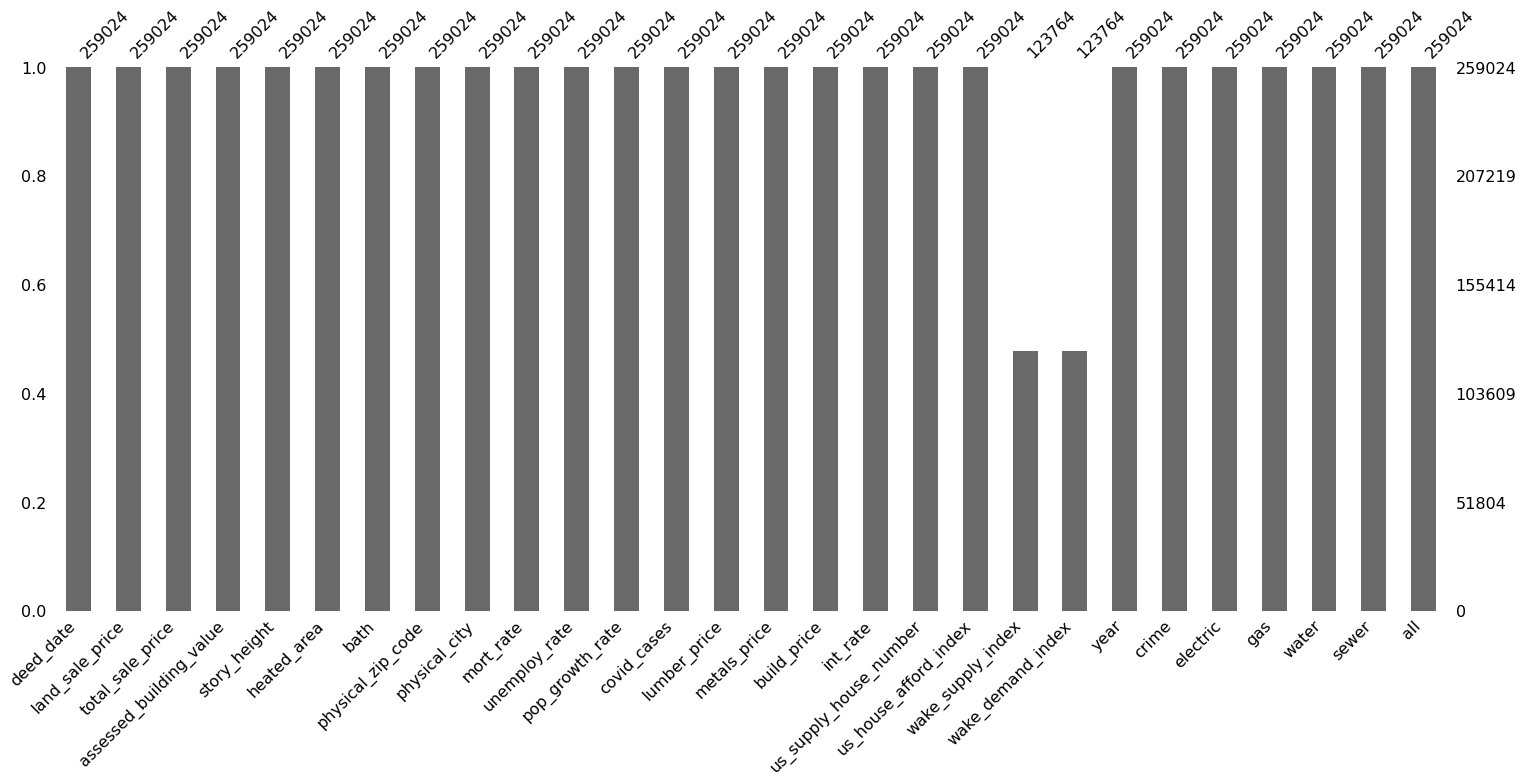

In [72]:
msno.bar(updated_house_df)

Since there is no Wake County house supply and demand data, we will leave the missing values as it.

# Save as a CSV file

In [73]:
# uncomment to save the data as a CSV file in your local drive if needed
updated_house_df.to_csv('assets/updated_house_df.csv', index=False)